In [4]:
import pandas as pd
from collections import Counter
from datetime import datetime, time, timedelta

### Histograma respecto a tiempo

In [5]:
travel_time_series = pd.read_csv('../data/travel_time_series.csv')
travel_time_series.head()

,id_sample,id_linkref,init_stop,init_name,end_stop,end_name,link,date_time_init,date_time_end,time_travel,init_idp,end_idp,veh,lap,date,time,hour,rg15min,horas,minute
0,0,0,100,inicio,101,primer stop,100:101,2023-03-01 07:24:21,2023-03-01 07:27:33,192.0,NaN,NaN,NaN,NaN,NaN,07:00:00,07:27:33,07:30:00,7,30
1,0,1,101,primer stop,102,segundo stop,101:102,2023-03-01 07:27:33,2023-03-01 07:29:19,106.0,13190622.0,13190922.0,SJ01,1.0,2023-03-01,07:00:00,07:29:19,07:30:00,7,30
2,0,2,102,segundo stop,103,Ccollana,102:103,2023-03-01 07:29:19,2023-03-01 07:30:49,90.0,13190922.0,13191197.0,SJ01,1.0,2023-03-01,07:00:00,07:30:49,07:30:00,7,30
3,0,3,103,Ccollana,104,Puente Huaccoto,103:104,2023-03-01 07:30:49,2023-03-01 07:31:13,24.0,13191197.0,13191276.0,SJ01,1.0,2023-03-01,07:00:00,07:31:13,07:30:00,7,30
4,0,4,104,Puente Huaccoto,105,Kayra,104:105,2023-03-01 07:31:13,2023-03-01 07:32:29,76.0,13191276.0,13191535.0,SJ01,1.0,2023-03-01,07:00:00,07:32:29,07:30:00,7,30


In [7]:
travel_time_series['time'].value_counts()

time
07:00:00    17535
12:00:00    17412
13:00:00    17125
10:00:00    17007
17:00:00    16966
11:00:00    16944
18:00:00    16689
16:00:00    16462
15:00:00    16297
14:00:00    16155
09:00:00    16024
06:00:00    15857
08:00:00    15448
19:00:00    13803
05:00:00    11261
20:00:00     5960
04:00:00      842
21:00:00      468
22:00:00       81
Name: count, dtype: int64

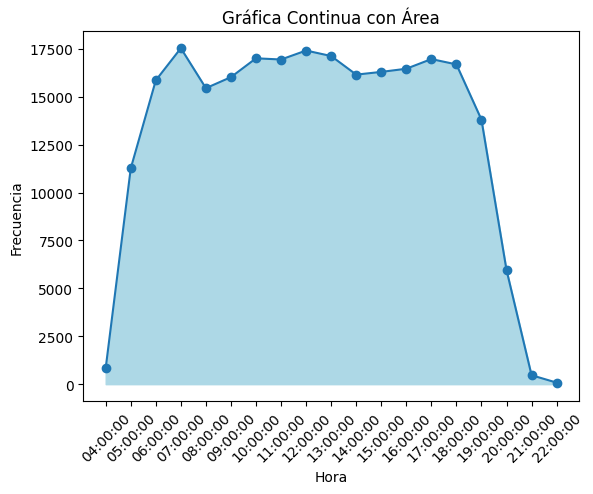

In [12]:
import matplotlib.pyplot as plt

# Datos de ejemplo
datos = {
    '07:00:00': 17535,
    '12:00:00': 17412,
    '13:00:00': 17125,
    '10:00:00': 17007,
    '17:00:00': 16966,
    '11:00:00': 16944,
    '18:00:00': 16689,
    '16:00:00': 16462,
    '15:00:00': 16297,
    '14:00:00': 16155,
    '09:00:00': 16024,
    '06:00:00': 15857,
    '08:00:00': 15448,
    '19:00:00': 13803,
    '05:00:00': 11261,
    '20:00:00': 5960,
    '04:00:00': 842,
    '21:00:00': 468,
    '22:00:00': 81
}

# Ordenar los datos por hora de menos a mayor
datos_ordenados = sorted(datos.items(), key=lambda x: x[0])

# Extraer las horas y frecuencias ordenadas
horas = [item[0] for item in datos_ordenados]
frecuencia = [item[1] for item in datos_ordenados]

# Crear la gráfica continua
plt.plot(horas, frecuencia, marker='o')

# Pintar el área debajo de la gráfica continua
plt.fill_between(horas, frecuencia, color='lightblue')

# Configurar etiquetas y título
plt.xlabel('Hora')
plt.ylabel('Frecuencia')
plt.title('Gráfica Continua con Área')

# Rotar las etiquetas del eje x para una mejor visualización
plt.xticks(rotation=45)

# Mostrar la gráfica continua con el área pintada
plt.show()